<a href="https://colab.research.google.com/github/CamiloInData/analisis-de-datos/blob/master/valores_nulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Obtener datos desde una API, organizarlos en una tabla, analizarlos y visualizar los resultados en una gráfica.

Importa las librerías necesarias:

requests para obtener datos desde internet.

pandas para convertir los datos a una tabla.

matplotlib.pyplot para graficar.

Usa esta API para obtener usuarios ficticios:
https://jsonplaceholder.typicode.com/users

Convierte los datos en un DataFrame y observa su estructura.

Extrae el campo city desde la columna address.

Cuenta cuántos usuarios hay por ciudad.

Crea una gráfica de barras con los resultados.

Exporta la tabla a Excel o CSV.

TABLA ORIGINAL:
   id              name   username                      email  \
0   1     Leanne Graham       Bret          Sincere@april.biz   
1   2      Ervin Howell  Antonette          Shanna@melissa.tv   
2   3  Clementine Bauch   Samantha         Nathan@yesenia.net   
3   4  Patricia Lebsack   Karianne  Julianne.OConner@kory.org   
4   5  Chelsey Dietrich     Kamren   Lucio_Hettinger@annie.ca   

                                             address                  phone  \
0  {'street': 'Kulas Light', 'suite': 'Apt. 556',...  1-770-736-8031 x56442   
1  {'street': 'Victor Plains', 'suite': 'Suite 87...    010-692-6593 x09125   
2  {'street': 'Douglas Extension', 'suite': 'Suit...         1-463-123-4447   
3  {'street': 'Hoeger Mall', 'suite': 'Apt. 692',...      493-170-9623 x156   
4  {'street': 'Skiles Walks', 'suite': 'Suite 351...          (254)954-1289   

         website                                            company  
0  hildegard.org  {'name': 'Romaguera-Crona', 'c

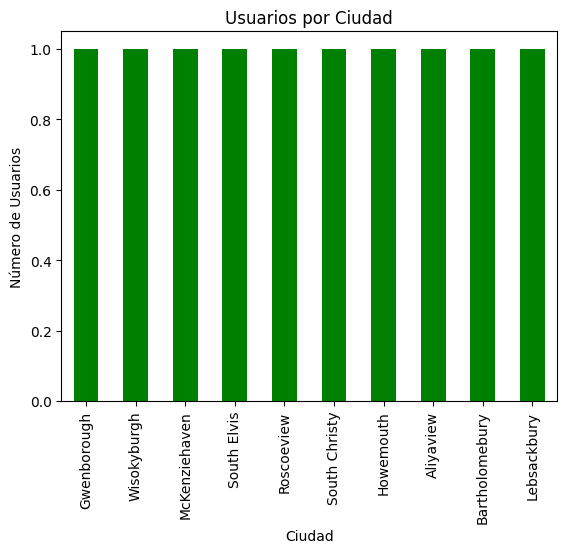


Archivos exportados: usuarios_api.csv y usuarios_api.xlsx


In [ ]:
# 1. Importar librerías
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 2. URL de la API
url = "https://jsonplaceholder.typicode.com/users"

# 3. Solicitar datos a la API
response = requests.get(url)
data = response.json()

# 4. Convertir los datos en DataFrame
df = pd.DataFrame(data)

# Ver primeras filas
print("TABLA ORIGINAL:")
print(df.head())

# 5. Extraer la ciudad desde la columna "address"
df["city"] = df["address"].apply(lambda x: x["city"])

print("\nTABLA CON COLUMNA 'city' EXTRAÍDA:")
print(df[["name", "city"]].head())

# 6. Contar usuarios por ciudad
conteo = df["city"].value_counts()

print("\nUSUARIOS POR CIUDAD:")
print(conteo)

# 7. Crear gráfica de barras
plt.figure()
conteo.plot(kind='bar', color='green')   # Aquí agregamos el color
  # No especificamos colores
plt.xlabel("Ciudad")
plt.ylabel("Número de Usuarios")
plt.title("Usuarios por Ciudad")
plt.show()

# 8. Exportar la tabla a CSV y Excel
df.to_csv("usuarios_api.csv", index=False)
df.to_excel("usuarios_api.xlsx", index=False)

print("\nArchivos exportados: usuarios_api.csv y usuarios_api.xlsx")


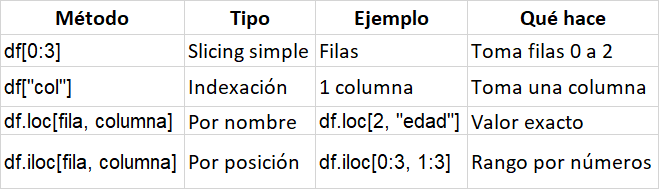

In [ ]:
#crear dataframe
import pandas as pd

data = {
    "nombre": ["Ana", "Luis", "Sofía", "Pedro", "Carla"],
    "edad": [20, 25, 22, 30, 27],
    "ciudad": ["Bogotá", "Cali", "Medellín", "Bogotá", "Cali"]
}

df = pd.DataFrame(data)
df
#seleccionar un Columna
df["nombre"]
#Seleccionar varias columnas
df[["nombre", "ciudad"]]
#Slicing (cortar filas por rango)
df[0:3]
#Indexar por número de fila y columna → .iloc
df.iloc[1:4, 0:2]
#Indexar por nombre de fila y columna → .loc
df.loc[1:3, "nombre":"ciudad"]


| Caso                                       | Método                        | Ejemplo                                                                        |
| ------------------------------------------ | ----------------------------- | ------------------------------------------------------------------------------ |
| Rellenar con promedio                      | `fillna(df["col"].mean())`    | `df["precio"].fillna(df["precio"].mean(), inplace=True)`                       |
| Rellenar con mediana                       | `fillna(df["col"].median())`  | `df["cantidad_vendida"].fillna(df["cantidad_vendida"].median(), inplace=True)` |
| Rellenar con el valor más frecuente (moda) | `fillna(df["col"].mode()[0])` | `df["mes"].fillna(df["mes"].mode()[0], inplace=True)`                          |


| Método                     | Uso                                 |
| -------------------------- | ----------------------------------- |
| `df.isnull()`              | Identifica valores nulos            |
| `df.isnull().sum()`        | Cuenta valores nulos                |
| `df.dropna()`              | Elimina filas con nulos             |
| `df.dropna(axis=1)`        | Elimina columnas con nulos          |
| `df.fillna(valor)`         | Reemplaza nulos con un valor        |
| `df["col"].fillna(metodo)` | Reemplaza nulos solo en una columna |


| Característica  | `None`                          | `NaN`                         |
| --------------- | ------------------------------- | ----------------------------- |
| Pertenece a     | Python (tipo estándar)          | NumPy / Pandas                |
| Significa       | Sin valor / vacío               | Valor faltante numérico       |
| Tipo de dato    | `NoneType`                      | `float`                       |
| Se usa más en   | Datos de tipo texto o en listas | Datos numéricos en DataFrames |
| Cómo se detecta | `is None`                       | `pd.isnull()` o `np.isnan()`  |


In [ ]:
import pandas as pd

data = {
    "producto": ["manzana", "", "banana", "naranja", " "],
    "precio": [2.5, 3.0, 1.8, 2.2, 2.9]
}

df = pd.DataFrame(data)
print(df)
#como detectar un valor vacio en pantas
df["producto"].replace(" ", None)


In [ ]:
import pandas as pd
import numpy as np

data = {
    "producto": ["Manzana", "Pera", "Banana", "Naranja"],
    "cantidad": [0, None, np.nan, 10]
}

df = pd.DataFrame(data)

print("DataFrame original:")
print(df)

print("\nIdentificación de valores nulos:")
print(df.isna())


DataFrame original:
  producto  cantidad
0  Manzana       0.0
1     Pera       NaN
2   Banana       NaN
3  Naranja      10.0

Identificación de valores nulos:
   producto  cantidad
0     False     False
1     False      True
2     False      True
3     False     False


In [ ]:
import pandas as pd
import numpy as np

# Creamos un DataFrame con espacios en blanco y valores normales
data = {
    "producto": ["Manzana", "Pera", "Banana", "Naranja"],
    "cantidad": ["100", "", "  ", "50"]   # atención aquí
}

df = pd.DataFrame(data)

print("DataFrame original:")
print(df)

# Convertimos espacios en blanco a NaN
df["cantidad"] = df["cantidad"].replace(["", " "], np.nan)

print("\nDataFrame con espacios reemplazados por NaN:")
print(df)

print("\nIdentificación de valores nulos:")
print(df.isna())


DataFrame original:
  producto cantidad
0  Manzana      100
1     Pera         
2   Banana         
3  Naranja       50

DataFrame con espacios reemplazados por NaN:
  producto cantidad
0  Manzana      100
1     Pera      NaN
2   Banana         
3  Naranja       50

Identificación de valores nulos:
   producto  cantidad
0     False     False
1     False      True
2     False     False
3     False     False


In [ ]:
import pandas as pd
import numpy as np

# Creamos un DataFrame con espacios en blanco y valores normales
data = {
    "producto": ["Manzana", "Pera", "Banana", "Naranja"],
    "cantidad": ["100", "", "  ", "50"]   # atención aquí
}

df = pd.DataFrame(data)

print("DataFrame original:")
print(df)

# Convertimos espacios en blanco a NaN
df["cantidad"] = df["cantidad"].replace(["", " "], np.nan)

print("\nDataFrame con espacios reemplazados por NaN:")
print(df)

print("\nIdentificación de valores nulos:")
print(df.isna())


DataFrame original:
  producto cantidad
0  Manzana      100
1     Pera         
2   Banana         
3  Naranja       50

DataFrame con espacios reemplazados por NaN:
  producto cantidad
0  Manzana      100
1     Pera      NaN
2   Banana         
3  Naranja       50

Identificación de valores nulos:
   producto  cantidad
0     False     False
1     False      True
2     False     False
3     False     False


In [ ]:
import pandas as pd
import numpy as np

# Creamos un DataFrame simulando valores vacíos
data = {
    "producto": ["Manzana", "Pera", "Banana", "Naranja"],
    "cantidad": [120, None, 200, None]   # celdas vacías se leen como None -> NaN
}

df = pd.DataFrame(data)

print("DataFrame original:")
print(df)

print("\nIdentificación de valores nulos:")
print(df.isna())

# Método 1: Eliminar filas con valores nulos
df_sin_nulos = df.dropna()

print("\nDataFrame después de eliminar filas con valores nulos:")
print(df_sin_nulos)

# Método 2: Reemplazar valores nulos por 0
df_reemplazo = df.fillna(0)

print("\nDataFrame reemplazando valores nulos por 0:")
print(df_reemplazo)


DataFrame original:
  producto  cantidad
0  Manzana     120.0
1     Pera       NaN
2   Banana     200.0
3  Naranja       NaN

Identificación de valores nulos:
   producto  cantidad
0     False     False
1     False      True
2     False     False
3     False      True

DataFrame después de eliminar filas con valores nulos:
  producto  cantidad
0  Manzana     120.0
2   Banana     200.0

DataFrame reemplazando valores nulos por 0:
  producto  cantidad
0  Manzana     120.0
1     Pera       0.0
2   Banana     200.0
3  Naranja       0.0


In [ ]:
import pandas as pd
import numpy as np

data = {
    "producto": ["manzana", "pera", "banana", "naranja", "uva"],
    "precio": [2.5, np.nan, 1.8, 2.2, np.nan],
    "cantidad_vendida": [100, 150, None, 80, 120],
    "mes": ["enero", "enero", "febrero", None, "marzo"]
}

df = pd.DataFrame(data)
print("📌 DataFrame con valores nulos:")
print(df)
"manzana", "", "pera", " "


In [ ]:
import pandas as pd
import numpy as np

# Creamos un DataFrame con valores faltantes
data = {
    "dia": [1, 2, 3, 4, 5],
    "temperatura": [25, np.nan, 28, np.nan, 30]
}

df = pd.DataFrame(data)

print("DataFrame original:")
print(df)

# Aplicar interpolación
df_interpolado = df.interpolate()

print("\nDataFrame después de interpolación:")
print(df_interpolado)


DataFrame original:
   dia  temperatura
0    1         25.0
1    2          NaN
2    3         28.0
3    4          NaN
4    5         30.0

DataFrame después de interpolación:
   dia  temperatura
0    1         25.0
1    2         26.5
2    3         28.0
3    4         29.0
4    5         30.0
